In [43]:
import librosa
import librosa.display

## Set Config

In [13]:
import os
from easydict import EasyDict

conf = EasyDict()

# Basic configurations
conf.sampling_rate = 44100
conf.duration = 1
conf.hop_length = 347  # to make time steps 128
conf.fmin = 20
conf.fmax = conf.sampling_rate // 2
conf.n_mels = 128
conf.n_fft = conf.n_mels * 20
conf.model = 'mobilenetv2'  # 'alexnet'

# Labels
conf.labels = ['Hi-hat', 'Saxophone', 'Trumpet', 'Glockenspiel', 'Cello', 'Knock',
               'Gunshot_or_gunfire', 'Clarinet', 'Computer_keyboard',
               'Keys_jangling', 'Snare_drum', 'Writing', 'Laughter', 'Tearing',
               'Fart', 'Oboe', 'Flute', 'Cough', 'Telephone', 'Bark', 'Chime',
               'Bass_drum', 'Bus', 'Squeak', 'Scissors', 'Harmonica', 'Gong',
               'Microwave_oven', 'Burping_or_eructation', 'Double_bass', 'Shatter',
               'Fireworks', 'Tambourine', 'Cowbell', 'Electric_piano', 'Meow',
               'Drawer_open_or_close', 'Applause', 'Acoustic_guitar',
               'Violin_or_fiddle', 'Finger_snapping']

# Training configurations
conf.folder = '.'
conf.n_fold = 1
conf.normalize = 'samplewise'
conf.valid_limit = None
conf.random_state = 42
conf.test_size = 0.01
conf.samples_per_file = 5
conf.batch_size = 32
conf.learning_rate = 0.0001
conf.epochs = 500
conf.verbose = 2
conf.best_weight_file = 'best_mobilenetv2_weight.h5'

# Runtime conficurations
conf.rt_process_count = 1
conf.rt_oversamples = 10
conf.pred_ensembles = 10
conf.runtime_model_file = os.path.join(os.path.dirname(
    os.getcwd()), 'model', 'mobilenetv2_fsd2018_41cls.pb')

conf.samples = conf.sampling_rate * conf.duration

## Recorded Sounds

In [5]:
!ls sounds/

1115003250.wav 1115011608.wav 1115024746.wav 1115080540.wav 1118133634.wav
1115003252.wav 1115011609.wav 1115024748.wav 1115080541.wav 1118133645.wav
1115003300.wav 1115011610.wav 1115024749.wav 1115080543.wav 1118133703.wav
1115003301.wav 1115011611.wav 1115024752.wav 1115080552.wav 1118133708.wav
1115003306.wav 1115011615.wav 1115025010.wav 1115080834.wav 1118133745.wav
1115003307.wav 1115011620.wav 1115025015.wav 1115081029.wav 1118134843.wav
1115003308.wav 1115011634.wav 1115025022.wav 1115081154.wav 1118134858.wav
1115003309.wav 1115011919.wav 1115025029.wav 1115081200.wav 1118134911.wav
1115003310.wav 1115011921.wav 1115071541.wav 1115081204.wav 1118144101.wav
1115004500.wav 1115011925.wav 1115071542.wav 1115081206.wav 1118144110.wav
1115004501.wav 1115024029.wav 1115071600.wav 1115081210.wav 1119143942.wav
1115004753.wav 1115024030.wav 1115071602.wav 1115081304.wav 1119143944.wav
1115004755.wav 1115024031.wav 1115071605.wav 1115081307.wav 1119144013.wav
1115005008.wav 1115024032

In [82]:
y, sr = librosa.load("./sounds/1115011605.wav", sr=conf.sampling_rate)

# trim silence
if 0 < len(y):  # workaround: 0 length causes error
    y, _ = librosa.effects.trim(y)  # trim, top_db=default(60)

    # make it unified length to conf.samples
if len(y) > conf.samples:  # long enough
    pass
    # cut long file
    # y = y[0:0+conf.samples]
else:  # pad blank
    padding = conf.samples - len(y)    # add padding at both ends
    offset = padding // 2
    y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')

In [83]:
y.shape

(151552,)

In [84]:
cq = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))

/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/sparse/lil.py:515: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/sparse/lil.py:517: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [85]:
cq.shape

(252, 297)

## Pitch Detection

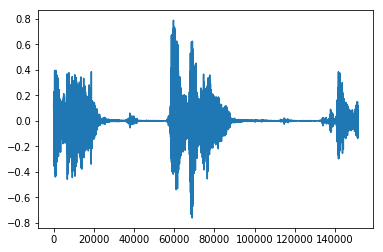

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(y)

In [87]:
import numpy as np

y_stft = np.abs(librosa.stft(y, ))

In [88]:
y_stft.shape

(1025, 297)

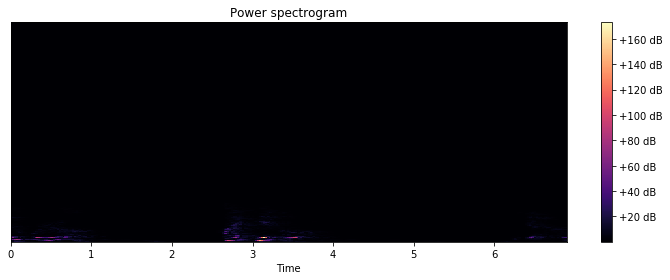

In [89]:
plt.figure(figsize=(10,4))
librosa.display.specshow(y_stft, x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
 
plt.tight_layout()
plt.show()

In [72]:
librosa.fft_frequencies(sr=conf.sampling_rate, n_fft=conf.n_fft)

array([0.00000000e+00, 1.72265625e+01, 3.44531250e+01, ...,
       2.20155469e+04, 2.20327734e+04, 2.20500000e+04])